# Lab 2 : Gradient Descent
In this lab, we aim to predict the profit of a company in various cities based on the population of those cities.

To accomplish this, we will analyze a dataset containing profit (y) and population characteristics of the residents (X).

The prediction will be carried out using the gradient descent algorithm.

# Importing the necessary libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the data files.
For this lab, we will read the data from a CSV file.

In [ ]:
# data
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP2_IARN/data.csv', delimiter=',')
data.shape

(97, 2)

In this data, the first column represents the first feature (population of a city in thousands), and the second column represents the profit (in thousands).

Each row represents an example in our dataset.

Let's place this data into their corresponding vectors.

In [ ]:
# Let's add the y-intercept theta 0.
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]
# Rescale the vector y.
y = y.reshape(y.shape[0], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Bénéfice x1000')

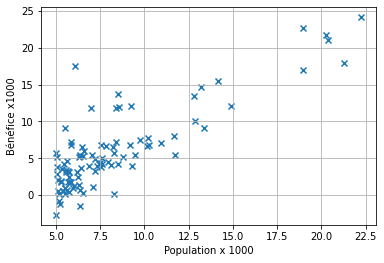

In [ ]:
# Let's plot this data for visualization
plt.scatter(X[:,1],y,marker ='x')
axes = plt.axes()
axes.grid()
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Gradient Descent: Function Preparation

1- Cost Computation

This function will be used to calculate the cost $J(\theta_0, \theta_1)$.

It takes the training dataset as input along with the initially defined parameters.

In [ ]:
# Cost Calculation without Vectorization
def computeCostNonVect(X, y, theta):
  m = len(y) # Number of examples
  sum_error = 0
  for i in range(m):
    sum_error = sum_error + np.square(theta[0] + theta[1]*X[i, 1] - y[i])
  return (1/2*m) * sum_error

In [ ]:
# Function that returns the matrix expression of the hypothesis function.
def h(X, theta):
  return np.matmul(X, theta)


# Cost Calculation with Vectorization
def computeCost(X, y, theta):
  m = len(y) # Number of examples
  return (1/2*m) * np.sum(np.square((h(X, theta) - y)))

2- Gradient Descent Function

This function will update the parameters $\theta_0, \theta_1$ until convergence: either reaching the maximum number of iterations or the derivative becoming sufficiently small.

In [ ]:
# gradient
def grad(X, y, theta):
  m = len(y)
  return (1/m) * np.matmul(X.T, (h(X, theta) - y))

# gradient descent
def gradientDescent(X, y, theta, alpha, iterations):
  m = len(y) # number of examples
  cout = [] # save the cost value at each iteration
  parametres = [] # Keep track of the values of theta0 and theta1 at each iteration.
  for i in range(iterations):
    theta = theta - alpha*grad(X, y, theta)
    cout.append(computeCost(X, y, theta))
    parametres.append(theta)
  return theta, cout, parametres

# Gradient Descent: Function Calls

Initialization of $\theta_0$ and $\theta_1$.

In [ ]:
theta = np.zeros((2, 1))
theta

array([[0.],
       [0.]])

Calculate the initial cost

In [ ]:
# Calculate the execution time of the computeCostNonVect() function.
import time
start = time.time()
initialCost_Nonvect = computeCostNonVect(X, y, theta)
print('cout initial sans vectorisation '+str(initialCost_Nonvect))
end = time.time()
print('temps exécution de la fonction computeCostNonVect() = '+str(end-start))

cout initial sans vectorisation [301772.35305298]
temps exécution de la fonction computeCostNonVect() = 0.0026373863220214844


In [ ]:
# Calculate the execution time of the computeCost() function.
import time
start = time.time()
initialCost=computeCost(X, y, theta)
print('cout initial avec vectorisation '+str(initialCost))
end = time.time()
print('temps exécution de la fonction computeCost() = '+str(end-start))

cout initial avec vectorisation 301772.35305298044
temps exécution de la fonction computeCost() = 0.0015900135040283203


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛ *Both functions, computeCostNonVect() and computeCost(), give us the same cost value. However, we can observe that computeCost() is more efficient, as its execution time is shorter than the execution time of computeCostNonVect().* ⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Calling the gradient calculation function.

In [ ]:
# parametres
iterations = 1500;
alpha = 0.01;
# call
theta, cout, parametres = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


Calculation of the final cost.

In [ ]:
# Calculation of the final cost.
cout_final = computeCost(X, y, theta)
print('cout final '+str(cout_final))

cout final 42184.20010623391


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛ *We can observe that the final cost is less than the initial cost (our model has learned effectively)*
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Plotting the cost function.

Note that $\theta^T x$ is equivalent to $X \theta$, where...$X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

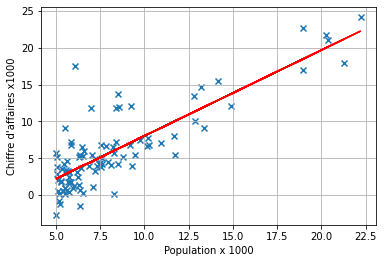

In [ ]:
y_pred=np.matmul(X,theta)
axes = plt.axes()
axes.grid()
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1],y_pred, c='r')
# The line on the graph represents the plotting of the hypothesis function
# The line should get closer to the data after training with gradient descent.

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
The line of the hypothesis function fits well within the cluster of points.
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Plotting the cost at each iteration.

Text(0, 0.5, 'coût')

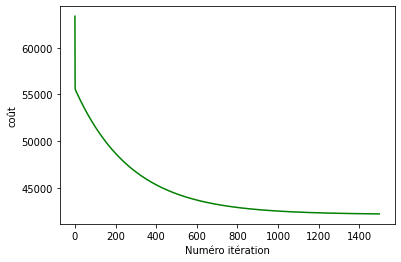

In [ ]:
plt.plot(range(1500), cout, c='g')
plt.xlabel('Numéro itération')
plt.ylabel('coût')

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛ *We should have stopped the algorithm around iteration number 1200.*
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Plotting the cost as a function of theta0 and theta1

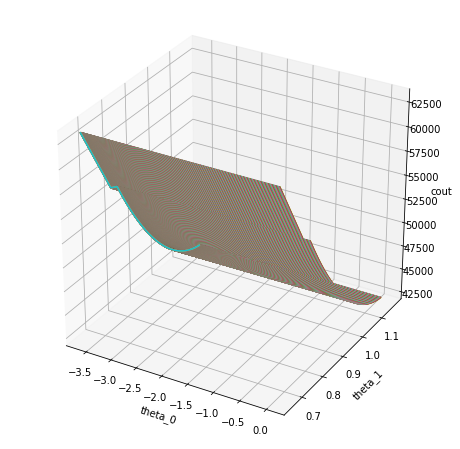

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
theta_0, theta_1 = np.meshgrid(np.array(parametres)[:, 0, 0], np.array(parametres)[:, 1, 0])
ax.plot3D(theta_0, theta_1, cout)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cout')
# ax.view_init(45, 0)
plt.show()

Making predictions for y values.

In [ ]:
# Predicting for a population of 35,000 and 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.45197679])

In [ ]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.53424501])

# Multiple linear regression

Using the previously defined functions, propose a linear regression when the number of features is greater than 1, using the following training dataset.

In [ ]:
# data
dataMulti = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP2_IARN/dataMulti.csv', delimiter=',')
dataMulti.shape

(47, 3)

For this dataset, we would like to predict the price of a house (3rd column of dataMulti) based on:
- Its area (1st column)
- The number of bedrooms (2nd column)

In [ ]:
# First, create X and y
intercept_Multi=np.ones((dataMulti.shape[0],1))
X_Multi = np.column_stack((intercept_Multi, dataMulti[:,0:2]))
y_multi = dataMulti[:, 2]
# Rescale the y_multi vector
y_multi = y_multi.reshape(y_multi.shape[0], 1)
print(' Y '+str(y_multi.shape))
print(' X '+str(X_Multi.shape))

 Y (47, 1)
 X (47, 3)


In [ ]:
# Redefine your cost functions if necessary

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛**Note: It's not necessary to redefine the cost and gradient descent functions.**
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Visualization of the data (3D representation).

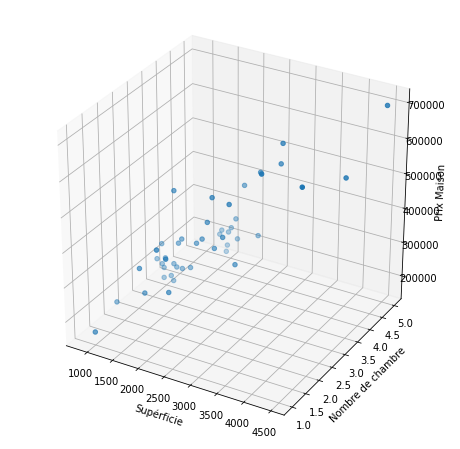

In [ ]:
# Let's plot this data for visualization (3D representation).
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Multi[:,1], X_Multi[:,2], y_multi)
ax.set_xlabel('Supérficie')
ax.set_ylabel('Nombre de chambre')
ax.set_zlabel('Prix Maison')
plt.show()

Data scaling.

In [ ]:
# Standardization
def standardisation(data):
  for i in range(data.shape[1]):
    Mean = np.mean(data[:, i])
    Std = np.std(data[:, i])
    for j in range(data.shape[0]):
      data[j, i] = (data[j, i] - Mean) / Std
  return data

In [ ]:
# Standardizing the data
X_Multi_copie = np.copy(X_Multi[:,1:3])
X_Multi_Stand = standardisation(X_Multi_copie)
print(X_Multi_Stand)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

Normalization of the data with mean = 0.

In [ ]:
# Function that normalizes the features
def normalisation(data):
  for i in range(data.shape[1]):
    Min = np.min(data[:, i])
    Max = np.max(data[:, i])
    for j in range(data.shape[0]):
      data[j, i] = (data[j, i] - Min) / (Max - Min)
  return data

In [ ]:
# Normalization of the data
X_Multi_Norm = normalisation(X_Multi_copie)
print(X_Multi_Norm)

[[0.34528406 0.5       ]
 [0.20628792 0.5       ]
 [0.42691671 0.5       ]
 [0.1555433  0.25      ]
 [0.59238831 0.75      ]
 [0.31246553 0.75      ]
 [0.18808605 0.5       ]
 [0.15857694 0.5       ]
 [0.145615   0.5       ]
 [0.17705461 0.5       ]
 [0.30005516 0.75      ]
 [0.31660232 0.5       ]
 [0.28626586 0.5       ]
 [1.         1.        ]
 [0.11472697 0.5       ]
 [0.39933811 0.75      ]
 [0.12906784 0.25      ]
 [0.10590182 0.5       ]
 [0.48455598 0.75      ]
 [0.60093767 0.75      ]
 [0.25234418 0.5       ]
 [0.28571429 0.25      ]
 [0.20739106 0.5       ]
 [0.30612245 0.75      ]
 [0.83783784 0.5       ]
 [0.06839493 0.5       ]
 [0.16712631 0.5       ]
 [0.46166575 0.5       ]
 [0.37175951 0.5       ]
 [0.49227799 0.5       ]
 [0.27220077 0.25      ]
 [0.04081633 0.        ]
 [0.32763376 0.75      ]
 [0.63017099 0.5       ]
 [0.26447876 0.75      ]
 [0.1613348  0.5       ]
 [0.10672918 0.5       ]
 [0.35300607 0.75      ]
 [0.92746828 0.75      ]
 [0.36127965 0.75      ]


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛*The values of the features are indeed between 0 and 1.*
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Visualization of the normalized data (3D representation).

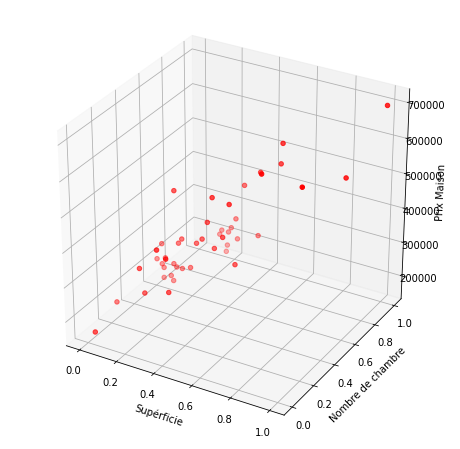

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Add the bias column to the normalized data.
X_MultiN = np.column_stack((intercept_Multi, X_Multi_Norm))
# plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_MultiN[:,1], X_MultiN[:,2], y_multi, c='r')
ax.set_xlabel('Supérficie')
ax.set_ylabel('Nombre de chambre')
ax.set_zlabel('Prix Maison')
plt.show()

Visualization of the original and normalized data (3D representation)

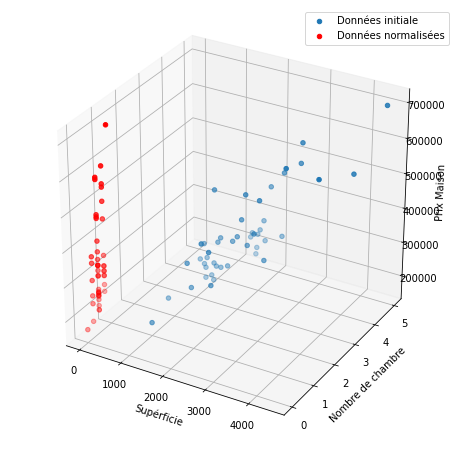

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Multi[:,1], X_Multi[:,2], y_multi, label='Données initiale')
ax.scatter(X_MultiN[:,1], X_MultiN[:,2], y_multi, c='r', label='Données normalisées')
ax.set_xlabel('Supérficie')
ax.set_ylabel('Nombre de chambre')
ax.set_zlabel('Prix Maison')
plt.legend()
plt.show()

Apply multiple variable gradient descent to the normalized data.


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛**Note: When I applied gradient descent on the non-normalized data, I encountered an overflow.**
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

In [ ]:
# Initialize theta0, theta1, theta2.
theta = np.zeros((3, 1))
theta

array([[0.],
       [0.],
       [0.]])

In [ ]:
# Calculate the initial cost.
initialCost=computeCost(X_Multi, y_multi, theta)
print('cout initial avec vectorisation '+str(initialCost))

cout initial avec vectorisation 144891812910000.0


In [ ]:
# Call the gradient calculation function.
# parametres
iterations = 1500;
alpha = 0.01;


# Apply gradient descent to the normalized data (X_MultiN).
theta_Multi, cout_Multi, parametres_Multi = gradientDescent(X_MultiN, y_multi, theta, alpha, iterations)

FinalCost = computeCost(X_Multi, y_multi, theta_Multi)
print('cout finale '+str(FinalCost))
print()
print('theta')
print(theta_Multi)

cout finale 3.012893498262513e+20

theta
[[193496.83442894]
 [242857.60855128]
 [132750.2686926 ]]


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
We observe that the final cost is less than the initial cost (our model has learned well).
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

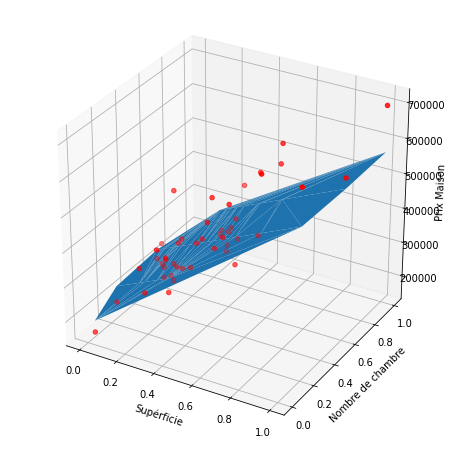

In [ ]:
y_pred_multi = np.matmul(X_MultiN,theta_Multi)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_MultiN[:,1], X_MultiN[:,2], y_multi, c='r')
ax.plot_trisurf(X_MultiN[:,1], X_MultiN[:,2], y_pred_multi.reshape(len(y_pred_multi)))
ax.set_xlabel('Supérficie')
ax.set_ylabel('Nombre de chambre')
ax.set_zlabel('Prix Maison')
plt.show()

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
*Our model fits well within the cluster of points; we can conclude that it has learned effectively.*
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛


Plotting the cost at each iteration

Text(0, 0.5, 'coût')

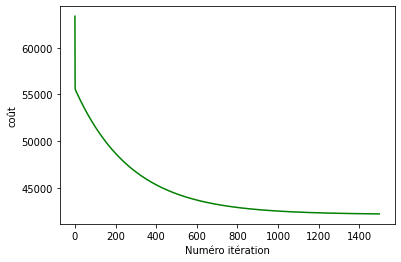

In [ ]:
plt.plot(range(1500), cout, c='g')
plt.xlabel('Numéro itération')
plt.ylabel('coût')

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
*We should have stopped the algorithm around iteration number 600.*
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Comparing gradient descent with and without normalization:
- **Example**: observe the difference in computation time.

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
**Note: When I apply gradient descent without normalization, I encounter an overflow, and I'm unable to make a comparison.**
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

# Implementation Verification
Compare your algorithms with those from scikit-learn

**Linear Regression**

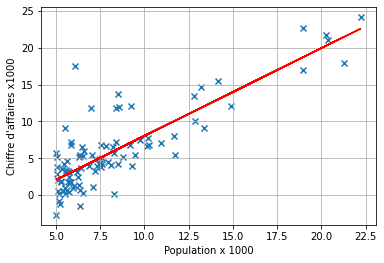

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiating an object of the LinearRegression class
model = LinearRegression()
# training
model.fit(X[:,1].reshape(X.shape[0], 1), y)
# prediction
y_predict = model.predict(X[:,1].reshape(X.shape[0], 1))

# plot
axes = plt.axes()
axes.grid()
plt.scatter(X[:,1], y, marker='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1], y_predict, c='r')

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
This 2D representation corresponds perfectly to the one implemented (line of the hypothesis function).
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

In [ ]:
# Displaying the final theta.
print(model.intercept_) # theta0
print(model.coef_) #theta1

[-3.89578088]
[[1.19303364]]


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
*The values of theta match perfectly with those of my implementation.*
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

**Multi linear regression**

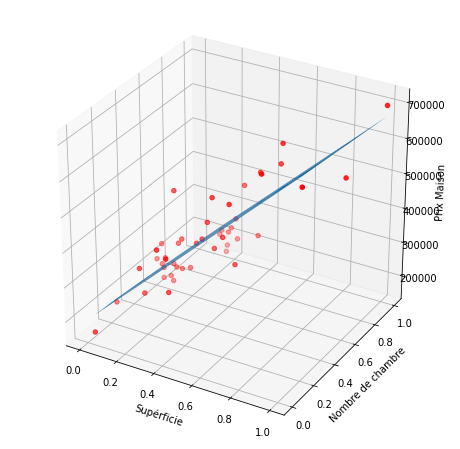

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiating an object of the LinearRegression class
modelM = LinearRegression()
# training
modelM.fit(X_MultiN[:,1:3], y_multi)
# prediction
# .reshape(X_MultiN.shape[0], 2)
y_predict_Multi = modelM.predict(X_MultiN[:,1:3])


# plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_MultiN[:,1], X_MultiN[:,2], y_multi, c='r')
ax.plot_trisurf(X_MultiN[:,1], X_MultiN[:,2], y_predict_Multi.reshape(len(y_predict_Multi)))
ax.set_xlabel('Supérficie')
ax.set_ylabel('Nombre de chambre')
ax.set_zlabel('Prix Maison')
plt.show()

In [ ]:
# Displaying the final theta.
print(modelM.intercept_) # theta0
print(modelM.coef_) #theta1, theta2

[199467.3112629]
[[504777.76124214 -34951.66168075]]


Standardization

In [ ]:
# Standardization of features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_MultiStand = scaler.fit_transform(X_Multi[:,1:3])
print(X_MultiStand)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
*The standardization matches perfectly with that of my implementation.*
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

Normalisation

In [ ]:
# Normalisation of features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_MultiNorm = scaler.fit_transform(X_Multi[:,1:3])
print(X_MultiNorm)

[[0.34528406 0.5       ]
 [0.20628792 0.5       ]
 [0.42691671 0.5       ]
 [0.1555433  0.25      ]
 [0.59238831 0.75      ]
 [0.31246553 0.75      ]
 [0.18808605 0.5       ]
 [0.15857694 0.5       ]
 [0.145615   0.5       ]
 [0.17705461 0.5       ]
 [0.30005516 0.75      ]
 [0.31660232 0.5       ]
 [0.28626586 0.5       ]
 [1.         1.        ]
 [0.11472697 0.5       ]
 [0.39933811 0.75      ]
 [0.12906784 0.25      ]
 [0.10590182 0.5       ]
 [0.48455598 0.75      ]
 [0.60093767 0.75      ]
 [0.25234418 0.5       ]
 [0.28571429 0.25      ]
 [0.20739106 0.5       ]
 [0.30612245 0.75      ]
 [0.83783784 0.5       ]
 [0.06839493 0.5       ]
 [0.16712631 0.5       ]
 [0.46166575 0.5       ]
 [0.37175951 0.5       ]
 [0.49227799 0.5       ]
 [0.27220077 0.25      ]
 [0.04081633 0.        ]
 [0.32763376 0.75      ]
 [0.63017099 0.5       ]
 [0.26447876 0.75      ]
 [0.1613348  0.5       ]
 [0.10672918 0.5       ]
 [0.35300607 0.75      ]
 [0.92746828 0.75      ]
 [0.36127965 0.75      ]


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
*The normalization matches perfectly with that of my implementation.*
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛